In [1]:
import pandas as pd
import numpy as np
!pip install fastai==1.0.60

from fastai.tabular import *
import datetime

df_tr = pd.read_csv("train_data_cleaned.csv")
df_tr['cooking_time'].unique()

array(['time_level_4', nan, 'time_level_5', 'time_level_6', 'time_level_3', 'time_level_7'], dtype=object)

In [2]:
cat_names = [ 'recipe_name', 'product_type', 'cuisine',
                'description','difficulty','dish_type',
                'is_classic','preferences','carbs_content',
             'dish_types','seasons','protein_types','course_type','meta_tags','protein_cuts']



In [3]:
for i in cat_names:
    print(i,len(df_tr[i].unique()))

recipe_name 931
product_type 4
cuisine 28
description 981
difficulty 2
dish_type 5
is_classic 1
preferences 45
carbs_content 44
dish_types 109
seasons 11
protein_types 35
course_type 2
meta_tags 15
protein_cuts 17


In [4]:
df_tr['carbs_content'].unique()
#df_tr['year_week']

array(['rice', 'pasta_incl_gnocchi_spatzle', nan, 'sweet_potato,pasta_incl_gnocchi_spatzle', 'low_carb', 'grains',
       'beans_pulses,grains', 'rice,panko_and_breadcrumbs', 'bread_and_others', 'tortillas_and_wraps',
       'low_carb,panko_and_breadcrumbs', 'beans_pulses,rice', 'non_rice_asian_noodles', 'potato', 'sweet_potato',
       'beans_pulses', 'sweet_potato,bread_and_others', 'dough', 'rice_noodles', 'gluten_free_grains',
       'beans_pulses,bread_and_others', 'panko_and_breadcrumbs', 'potato,panko_and_breadcrumbs',
       'panko_and_breadcrumbs,bread_and_others', 'pasta_incl_gnocchi_spatzle,panko_and_breadcrumbs',
       'beans_pulses,potato', 'low_carb,tortillas_and_wraps', 'beans_pulses,tortillas_and_wraps',
       'grains,bread_and_others', 'beans_pulses,low_carb', 'beans_pulses,pasta_incl_gnocchi_spatzle', 'batter',
       'pasta_incl_gnocchi_spatzle,bread_and_others', 'potato,dough', 'sweet_potato,tortillas_and_wraps',
       'sweet_potato,grains', 'no_carbs', 'beans_pu

In [5]:
def process_cooking_time(x):
    return int(x.split('_')[2])

def encode_heat_level(x):
    if x== np.nan:
        return 0
    elif x=='no_heat':
        return 0
    elif x=='optional_heat':
        return 1
    elif x=='high':
        return 3
    elif x=='non_spicy':
        return 2

def feature_creation(df_tr):
    df_tr['cooking_time'].fillna('time_level_4',inplace = True)
    df_tr['cooking_time'] = df_tr['cooking_time'].apply(lambda x:process_cooking_time(x))
    df_tr['carbs_content'] = df_tr['carbs_content'].str.replace('_',' ')
    df_tr['protein_cuts'] = df_tr['protein_cuts'].str.replace('_',' ')
    df_tr['heat_level'] = df_tr['heat_level'].apply(lambda x:encode_heat_level(x))
    df_tr['log_sales'] = np.log(df_tr['sales'])
    #df_tr['product_type'] = pd.get_dummies(df_tr['product_type'])
    df_tr['week_num'] = df_tr['year_week'].apply(lambda x:int(str(x)[-2:]))
    df_tr['year'] = df_tr['year_week'].apply(lambda x:int(str(x)[0:4]))
    return df_tr
df_tr = feature_creation(df_tr)

In [6]:
df_tr['carbs_content'].unique()

array(['rice', 'pasta incl gnocchi spatzle', nan, 'sweet potato,pasta incl gnocchi spatzle', 'low carb', 'grains',
       'beans pulses,grains', 'rice,panko and breadcrumbs', 'bread and others', 'tortillas and wraps',
       'low carb,panko and breadcrumbs', 'beans pulses,rice', 'non rice asian noodles', 'potato', 'sweet potato',
       'beans pulses', 'sweet potato,bread and others', 'dough', 'rice noodles', 'gluten free grains',
       'beans pulses,bread and others', 'panko and breadcrumbs', 'potato,panko and breadcrumbs',
       'panko and breadcrumbs,bread and others', 'pasta incl gnocchi spatzle,panko and breadcrumbs',
       'beans pulses,potato', 'low carb,tortillas and wraps', 'beans pulses,tortillas and wraps',
       'grains,bread and others', 'beans pulses,low carb', 'beans pulses,pasta incl gnocchi spatzle', 'batter',
       'pasta incl gnocchi spatzle,bread and others', 'potato,dough', 'sweet potato,tortillas and wraps',
       'sweet potato,grains', 'no carbs', 'beans pu

In [7]:
df_tr['dish_type'].unique()

array(['fish', 'veggie', 'meat', nan, 'wine_and_dessert'], dtype=object)

In [8]:
df_tr['cooking_tip'].unique()

array([nan])

In [9]:
df_tr['protein_cuts'].unique()

array([nan, 'no cut', 'breast', 'tenderloin', 'burger patty', 'chops boneless', 'steak', 'drumsticks', 'fillet',
       'ground mince', 'sausage', 'strips', 'chops bone in', 'thighs boneless skinless', 'thighs bone in skin on',
       'cubes', 'pulled and shaved'], dtype=object)

In [10]:
#df_tr[df_tr['recipe_id'] ==11963]

In [11]:
len(df_tr['protein_cuts'].unique())

17

In [12]:
df_tr['product_type'].value_counts(normalize = True)

2 person    0.455597
family      0.454236
z_amazon    0.073494
add_on      0.016672
Name: product_type, dtype: float64

In [13]:
df_tr['cuisine'].value_counts(normalize = True)

new_american              0.425926
italian                   0.160494
asian                     0.113485
mexican                   0.060779
asian_fusion              0.043210
mediterranean             0.038936
central_south_american    0.025641
indian                    0.019943
european                  0.017094
thai                      0.014245
middle_eastern            0.014245
american                  0.011871
french                    0.008547
british_irish             0.007597
japanese                  0.006648
german                    0.005698
vietnamese                0.003799
eastern_european          0.003799
north_african             0.003799
greek                     0.002849
fusion                    0.002849
tex_mex                   0.002849
caribbean                 0.001899
korean                    0.000950
chinese                   0.000950
swedish                   0.000950
south_american            0.000950
Name: cuisine, dtype: float64

In [14]:
df_tr['difficulty'].value_counts(normalize = True)

easy    1.0
Name: difficulty, dtype: float64

In [15]:
import seaborn as sns
#sns.distplot(df_tr['proteins'])

In [16]:
df_tr['dish_types'].value_counts(normalize = True)

meat_and_side                               0.288591
pasta                                       0.086801
fish_and_side                               0.044743
meat_and_side,one_pot                       0.040268
sandwiches_wraps                            0.038031
veggie_and_side                             0.034899
burgers                                     0.034452
tacos_tortillas_dishes                      0.031767
soup                                        0.027740
salad,meat_and_side                         0.025056
pizza_tart                                  0.019687
salad                                       0.017897
stir_fry,noodle                             0.015213
stew,meat_and_side                          0.013423
stew                                        0.012528
pasta,one_pot                               0.012528
noodle                                      0.010738
meat_and_side,oven_backed                   0.010291
pasta,oven_backed,one_pot                   0.

In [17]:
df_tr['seasons'].value_counts(normalize = True)

all_seasons             0.969712
summer                  0.010924
autumn                  0.004965
winter                  0.003972
spring                  0.003972
spring,autumn,winter    0.001986
easter                  0.001986
autumn,winter           0.000993
summer,bbq              0.000993
thanksgiving            0.000497
Name: seasons, dtype: float64

In [18]:
df_tr['meta_tags'].value_counts(normalize = True)

quick                                0.242629
kid_friendly                         0.176897
healthy_choice                       0.158531
healthy_choice,quick                 0.157081
kid_friendly,quick                   0.123248
quick,healthy_choice                 0.043016
quick,kid_friendly                   0.032866
kid_friendly,healthy_choice          0.026100
kid_friendly,quick,healthy_choice    0.013533
kid_friendly,healthy_choice,quick    0.010633
healthy_choice,kid_friendly          0.008700
healthy_choice,kid_friendly,quick    0.002900
quick,kid_friendly,healthy_choice    0.001933
healthy_choice,quick,kid_friendly    0.001933
Name: meta_tags, dtype: float64

/Users/gfg_user/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

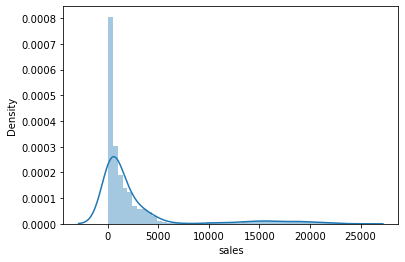

In [19]:
sns.distplot(df_tr['sales'])

/Users/gfg_user/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

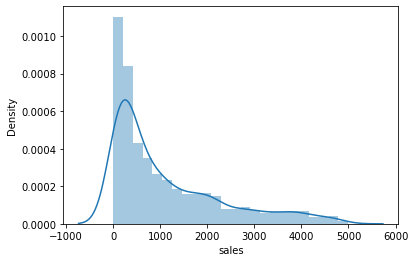

In [20]:
sns.distplot(df_tr[df_tr['sales']<5000]['sales'])

/Users/gfg_user/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sales', ylabel='Density'>

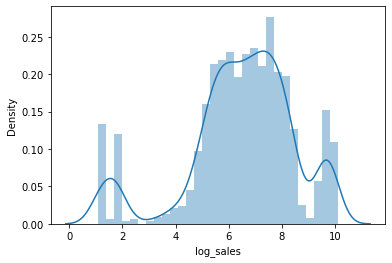

In [21]:
sns.distplot(df_tr['log_sales'])

/Users/gfg_user/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='proteins', ylabel='Density'>

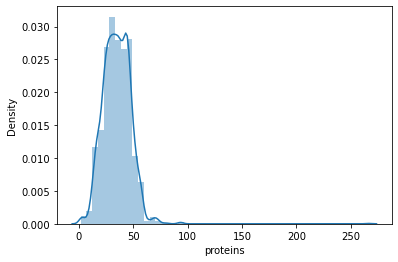

In [22]:
sns.distplot(df_tr['proteins'])

Text(0, 0.5, 'log_sales')

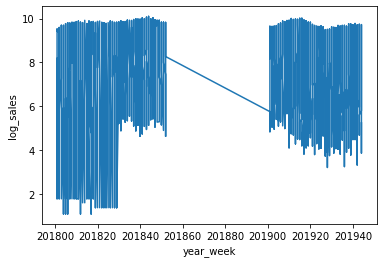

In [23]:
import matplotlib.pyplot as plt
df_tr2 = df_tr[['log_sales','year_week']].set_index('year_week')
df_tr2['log_sales'].plot()
plt.ylabel("log_sales")

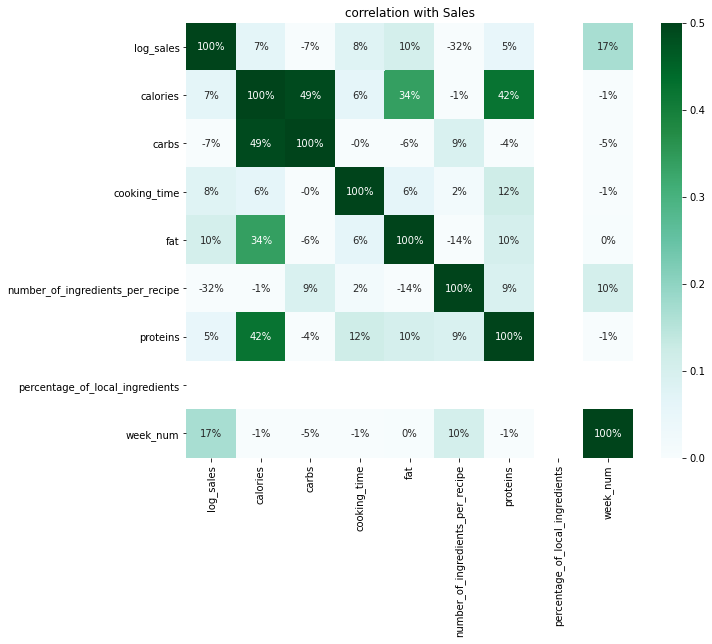

In [24]:
cont_names = [ 'log_sales',
                'calories',
              'carbs','cooking_time' ,
              'fat',
              'number_of_ingredients_per_recipe',
              'proteins',
              'percentage_of_local_ingredients',
              'week_num'
             ]

data = df_tr[cont_names].corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('correlation with Sales')
sns.heatmap(data = data, 
            annot = True,
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5, cmap = 'BuGn')


plt.show()

In [25]:
from sklearn.model_selection import train_test_split
cols = \
[
#'year_week',
 #'recipe_id',
  'week_num',
    'year',
 'recipe_name',
 'product_type',
 'calories',
 'carbs',
 'cooking_time',
 'cuisine',
 'description',
 'difficulty',
 'dish_type',
 'heat_level',
 'fat',
 'is_classic',
 'number_of_ingredients_per_recipe',
 'preferences',
 'carbs_content',
 'dish_types',
 'seasons',
 'protein_types',
 'proteins',
 'course_type',
# 'cooking_tip',
 'meta_tags',
 'percentage_of_local_ingredients',
 'protein_cuts',
 'sales'
]
df_tr = df_tr[cols]


from fastai.tabular import *
dep_var = 'sales'
#cat_names = data.select_dtypes(exclude=['int', 'float']).columns
cat_names = [ \
            'recipe_name', 
             'product_type', 
             'cuisine',
             'description',
             'difficulty',
             'dish_type',
             'heat_level',
             'is_classic',
             'preferences',
             'carbs_content',
             'dish_types',
             'seasons',
             'protein_types',
             'course_type',
             'meta_tags',
             'protein_cuts',
             'year'
            ]

#cont_names = data.select_dtypes([np.number]).columns
cont_names = [ 'calories',
              'carbs','cooking_time' ,
              'fat',
              'number_of_ingredients_per_recipe',
              'proteins',
              'percentage_of_local_ingredients',
              'week_num'
             ]



In [26]:
len(df_tr['product_type'].unique())

4

In [27]:
categories = df_tr[cat_names].nunique().keys()
cardinalities = df_tr[cat_names].nunique().values
emb_szs1 = {cat: min(50, card//2) for cat, card in zip(categories, cardinalities)}
emb_szs1

{'recipe_name': 50,
 'product_type': 2,
 'cuisine': 13,
 'description': 50,
 'difficulty': 0,
 'dish_type': 2,
 'heat_level': 2,
 'is_classic': 0,
 'preferences': 22,
 'carbs_content': 21,
 'dish_types': 50,
 'seasons': 5,
 'protein_types': 17,
 'course_type': 0,
 'meta_tags': 7,
 'protein_cuts': 8,
 'year': 1}

## Kfold cross-validation

FOLD ********** 1 2351 588


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,40.072834,26.767868,5.168116,-10.795776,00:00
1,19.946915,2.630870,1.615312,-0.200852,00:00
2,9.590178,1.738130,1.307385,0.295469,00:00
3,4.793529,0.883866,0.929737,0.655835,00:00
4,2.640847,1.177969,1.052356,0.581677,00:01
5,1.596491,0.769099,0.866514,0.675409,00:01
6,1.143400,0.976438,0.983576,0.599273,00:01
7,0.861919,0.978705,0.975109,0.621362,00:01
8,0.789438,1.090816,1.023117,0.595441,00:00
9,0.804711,1.133162,1.017332,0.632341,00:00


FOLD ********** 2 2351 588


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,37.849041,27.391401,5.220504,-10.788429,00:00
1,19.027658,3.380836,1.798436,-0.188458,00:00
2,9.142839,1.595102,1.257618,0.317160,00:00
3,4.655484,0.929538,0.950807,0.631302,00:00
4,2.552000,0.921604,0.937519,0.665904,00:00
5,1.579388,1.097475,1.037848,0.497505,00:00
6,1.136230,0.832786,0.909574,0.634142,00:00
7,0.912085,1.577404,1.243084,0.386606,00:00
8,0.871566,1.825008,1.279118,0.469486,00:00
9,0.779343,0.779679,0.873940,0.671979,00:00


FOLD ********** 3 2351 588


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,39.617138,29.483192,5.419328,-11.326817,00:00
1,20.387657,1.621512,1.254996,0.256123,00:01
2,9.620078,1.646338,1.276704,0.368913,00:01
3,4.839855,0.990848,0.982128,0.546248,00:01
4,2.693240,0.821299,0.884374,0.706557,00:00
5,1.731931,0.955918,0.967176,0.599239,00:00
6,1.198995,0.993263,0.974212,0.653139,00:00
7,0.933401,0.775228,0.866688,0.694806,00:00
8,0.791859,0.679979,0.816447,0.695187,00:00
9,0.754200,0.661420,0.803057,0.708974,00:01


FOLD ********** 4 2351 588


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,38.443878,25.622051,5.050704,-10.724259,00:00
1,19.630888,1.936321,1.313384,-0.059762,00:00
2,9.267828,1.593672,1.246594,0.266429,00:00
3,4.638955,0.820950,0.891090,0.649490,00:00
4,2.498962,0.747092,0.853577,0.672426,00:00
5,1.486369,0.876912,0.928767,0.610217,00:00
6,1.023057,1.007170,0.996817,0.528736,00:00
7,0.862584,1.495171,1.210378,0.375681,00:00
8,0.868981,2.429416,1.539191,-0.007171,00:00
9,0.785932,0.860561,0.915169,0.632908,00:00


FOLD ********** 5 2352 587


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,36.864300,24.736395,4.966671,-9.726258,00:00
1,18.314043,1.598684,1.258239,0.243493,00:00
2,8.853755,1.730344,1.309732,0.241086,00:00
3,4.537598,1.183575,1.079818,0.452764,00:00
4,2.512566,0.811099,0.892571,0.639399,00:00
5,1.573858,1.009039,0.991158,0.514927,00:00
6,1.105675,1.099604,1.027886,0.469596,00:00
7,0.827534,0.722085,0.835133,0.664955,00:00
8,0.757715,1.050370,1.012145,0.514821,00:00
9,0.754387,2.596002,1.569471,0.092985,00:00


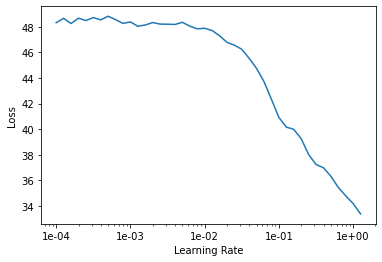

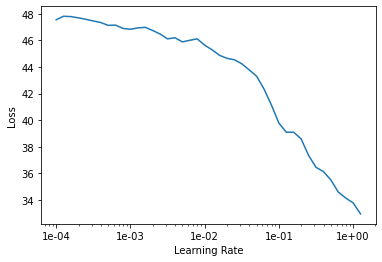

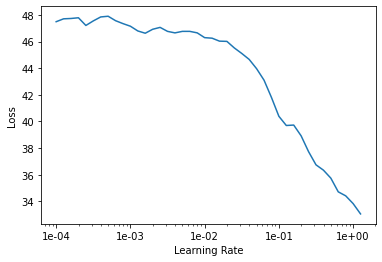

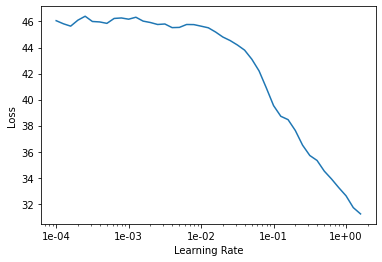

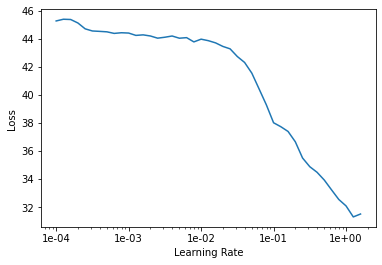

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5,shuffle = True)
df_tr2 = df_tr.copy()
c = 0
for train_index, val_index in kf.split(df_tr2):
    c +=1
    print("FOLD",'*'*10,c, len(train_index),len(val_index))

    procs = [FillMissing, Categorify, Normalize]

    data = (TabularList.from_df(df_tr2, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                            .split_by_idx(list(val_index))
                            .label_from_df(cols = dep_var,label_cls = FloatList, log = True )
                        #    .add_test(test)
                            .databunch())
     
     
    learn = tabular_learner(data, layers=[300,200, 100, 50], metrics=[rmse,r2_score],emb_drop=0.1,emb_szs=emb_szs1)

    # select the appropriate learning rate
    learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
    # we typically find the point where the slope is steepest
    learn.recorder.plot()

    # Fit the model based on selected learning rate
    learn.fit_one_cycle(50, max_lr =1e-01)

In [29]:
y = df_tr['sales']
X = df_tr.drop('sales',axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)



val_idx = test.index

# Transformations
procs = [FillMissing, Categorify, Normalize]

# Test Tabular List


test = (TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs))



# Train Data Bunch

data = (TabularList.from_df(df_tr, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(val_idx))
                        .label_from_df(cols = dep_var,label_cls = FloatList, log = True )
                    #    .add_test(test)
                        .databunch())

In [30]:
emb_szs1

{'recipe_name': 50,
 'product_type': 2,
 'cuisine': 13,
 'description': 50,
 'difficulty': 0,
 'dish_type': 2,
 'heat_level': 2,
 'is_classic': 0,
 'preferences': 22,
 'carbs_content': 21,
 'dish_types': 50,
 'seasons': 5,
 'protein_types': 17,
 'course_type': 0,
 'meta_tags': 7,
 'protein_cuts': 8,
 'year': 1}

In [31]:
#embeddings = emb_szs1
column_embeddings = pd.DataFrame()
column_embeddings['cat_column'] = np.array([i for i in emb_szs1.keys()])
column_embeddings['embed_shape'] = np.array([i for i in emb_szs1.values()])
column_embeddings

,cat_column,embed_shape
0,recipe_name,50
1,product_type,2
2,cuisine,13
3,description,50
4,difficulty,0
5,dish_type,2
6,heat_level,2
7,is_classic,0
8,preferences,22
9,carbs_content,21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,39.957638,26.453817,5.136139,-5.196230,00:00
1,20.124580,2.761614,1.656973,0.363999,00:00
2,9.650124,1.280944,1.123569,0.696981,00:00
3,4.898515,0.669008,0.804988,0.843530,00:01
4,2.647043,1.161336,1.076521,0.729681,00:00
5,1.649139,1.403806,1.181896,0.676692,00:00
6,1.162735,0.911304,0.948452,0.789064,00:00
7,0.974110,1.722336,1.304985,0.611163,00:00
8,0.914991,4.108107,2.020376,0.055122,00:00
9,0.764508,0.765602,0.871322,0.823329,00:00


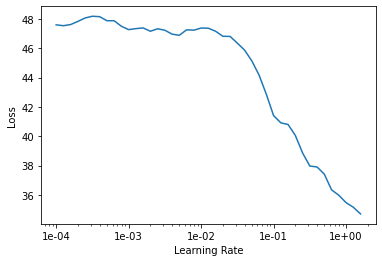

In [32]:
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics=[rmse,r2_score],emb_drop=0.1,emb_szs=emb_szs1)

# select the appropriate learning rate
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(50, max_lr =1e-01)

In [33]:
learn.show_results(ds_type=DatasetType.Valid)

recipe_name,product_type,cuisine,description,difficulty,dish_type,heat_level,is_classic,preferences,carbs_content,dish_types,seasons,protein_types,course_type,meta_tags,protein_cuts,year,calories_na,carbs_na,fat_na,proteins_na,percentage_of_local_ingredients_na,calories,carbs,cooking_time,fat,number_of_ingredients_per_recipe,proteins,percentage_of_local_ingredients,week_num,target,prediction
Warm Ravioli Salad,2 person,new_american,"Tortellini salad is a 90's throw-back, but we've riffed on that classic dish by replacing tortellini with ravioli and adding fresh and sun-dried tomatoes and spinach for an updated version that we believe will be an instant hit. It's the perfect summer meal—light but substantial—and wonderfully portable. It's perfect for a summer picnic, seeing as July is National Picnic Month! Cook, relax, an...",easy,veggie,0.0,No,dairy,pasta incl gnocchi spatzle,"salad,pasta,one_pot",all_seasons,dairy,main,"quick,healthy_choice",no cut,2019,False,False,False,False,False,-0.0373,-0.7553,-2.2591,0.4473,-1.6393,0.3510,0.0000,0.3720,7.0475173,[8.486753]
Ginger-Tamari Grilled Veggies,2 person,asian,"Grain bowls are where it's at when you want a quick, balanced, flavorful dinner—so, basically always. This was so plentiful, we had to make it a grain plate! The foundation features a furikake-ginger infused jasmine rice with protein-rich edamame dotted throughout. A layer of grilled squash and bok choy goes on top before the whole dish gets treated to a drizzle of a creamy tamari-ginger sauce.",easy,veggie,0.0,No,no_protein,rice,veggie_and_side,all_seasons,no_protein,main,"healthy_choice,quick",no cut,2018,False,False,False,False,False,-0.2580,0.4089,1.1088,-0.1089,-1.0919,-1.6702,0.0000,-0.1499,7.113956,[6.427081]
Seared Steak & Ranch Wedge,2 person,new_american,"This dish takes a classic meat and potato dinner to next level goodness. Steak gets a dusting of salt and pepper before being seared in a hot skillet producing a flavorful, crusty exterior. The steaks are paired with zesty barbecue spiced sweet potato fries and a romaine wedge salad that is drizzled with homemade ranch dressing. Cook, relax, and enjoy!",easy,meat,0.0,No,beef,sweet potato,meat_and_side,all_seasons,beef,main,#na#,steak,2019,False,False,False,False,False,-0.1566,-1.1688,1.1088,0.4128,-0.5446,0.0063,0.0000,0.8940,9.342596,[7.205985]
Sweet & Sour Braised Pork,family,new_american,"All the flavors come together beautifully in this dish. Apples simmer in apple juice, brown sugar, apple cider vinegar, and warm spices to create a sweet and sour sauce that smothers juicy pork chops. For an amped up twist on potatoes, we've smashed them and browned them in butter and crispy sage. Cook, relax, and enjoy!\t\t\t\t\t\t\t\t",easy,#na#,#na#,No,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2018,False,False,False,False,False,0.6187,0.1036,1.1088,0.2055,0.0028,0.3980,0.0000,-1.3429,5.7838254,[6.018169]
Cilantro-Lime Shrimp Pan Roast,2 person,new_american,"For our jalapeño remoulade sauce we took inspiration from a Peruvian aji sauce, which is a traditional creamy dipping sauce full of spicy chile, cilantro, and onions. We livened ours up with tangy lime juice, chopped cilantro, and garlic. It's perfect alongside this quick and easy one-pan roast of sweet wild US Gulf shrimp and roasted veggies. Cook, relax, and enjoy!",easy,fish,0.0,No,shellfish,potato,"fish_and_side,oven_backed,one_pot",all_seasons,shellfish,main,"kid_friendly,quick,healthy_choice",#na#,2019,False,False,False,False,False,-0.0969,-0.1509,1.1088,0.1364,0.0028,-0.6204,0.0000,-1.6411,7.770645,[7.496359]



The calculated RMSE & R-Squared For The Training Set : [tensor(0.1561), tensor(0.9926)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(0.5798), tensor(0.9206)]


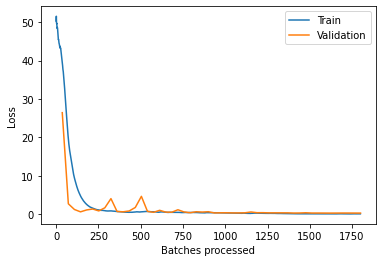

In [34]:
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])
learn.recorder.plot_losses()



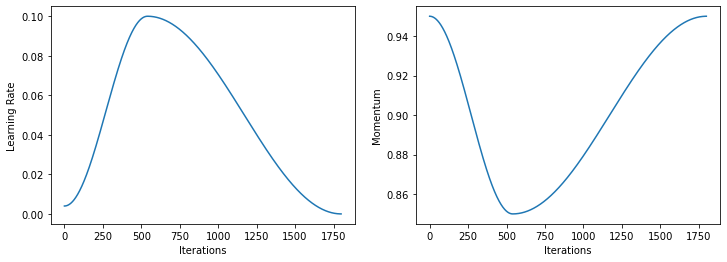

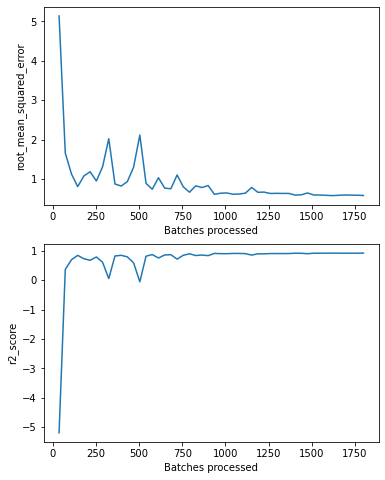

In [35]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()



## Predict on Test data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


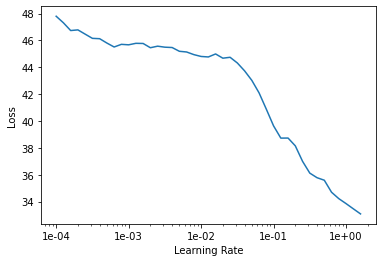

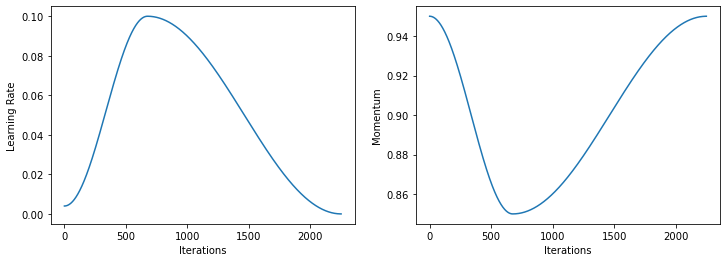

In [36]:

# Train Data Bunch

data = (TabularList.from_df(df_tr, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                    #    .split_by_idx(list(None))
                         .split_none()
                        .label_from_df(cols = dep_var,label_cls = FloatList, log = True )
                    #    .add_test(test)
                        .databunch())

learn = tabular_learner(data, layers=[300,200, 100, 50], metrics=[rmse,r2_score],emb_drop=0.1,emb_szs=emb_szs1)

# select the appropriate learning rate
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(50, max_lr =1e-01)


#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)





In [37]:
test_data = pd.read_csv("test_data_cleaned.csv")
test_data.head()


,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,...,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
0,201945,38287,Juicy Lucy Meatloaf,2 person,990.0,65.0,time_level_5,mexican,Just when you thought meatloaf couldn't get an...,easy,...,meat_and_side,NaN,"beef,dairy",42.0,main,NaN,kid_friendly,0.0,ground_mince,NaN
1,201945,38309,Baja-Style Cauliflower Tacos,2 person,790.0,60.0,time_level_4,mexican,Pico de gallo is a Mexican salsa made from cho...,easy,...,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,NaN,quick,0.0,no_cut,NaN
2,201945,38310,Baja-Style Cauliflower Tacos,family,690.0,60.0,time_level_4,mexican,Pico de gallo is a Mexican salsa made from cho...,easy,...,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,NaN,quick,0.0,no_cut,NaN
3,201945,38311,Brown Butter Cheese Ravioli,2 person,830.0,57.0,time_level_3,new_american,"A quick brown butter sauce, although humble in...",easy,...,pasta,all_seasons,dairy,20.0,main,NaN,"kid_friendly,quick",0.0,no_cut,NaN
4,201945,38312,Brown Butter Cheese Ravioli,family,770.0,51.0,time_level_3,new_american,"A quick brown butter sauce, although humble in...",easy,...,pasta,all_seasons,dairy,20.0,main,NaN,"kid_friendly,quick",0.0,no_cut,NaN


In [38]:
test_data2 = test_data.copy()
test_data2 = feature_creation(test_data2)
test_data2 = test_data2[cols]

In [39]:
test_data2.drop('sales',axis = 1,inplace = True)


In [40]:
test_data['year_week'].unique()

array([201945, 201946, 201947, 201948, 201949, 201950, 201951, 201952])

In [41]:
preds = []
idx_lst =[]
recipe_id_lst = []
year_week_lst = []
for idx in test_data2.index:
    row = test_data2.iloc[idx]
    recipe_id = test_data.iloc[idx]['recipe_id']
    year_week = test_data.iloc[idx]['year_week']
    recipe_id_lst.append(recipe_id)
    year_week_lst.append(year_week)
    idx_lst.append(idx)
    pred = np.exp(float(learn.predict(row)[1]))
    preds.append(pred)
    

In [42]:
result = pd.DataFrame()
result['recipe_id'] = np.array(recipe_id_lst)
result['year_week'] = np.array(year_week_lst)
result['predicted_sales'] = np.array(preds)
result.to_csv('result.csv')

In [43]:
result

,recipe_id,year_week,predicted_sales
0,38287,201945,1547.931167
1,38309,201945,1200.404722
2,38310,201945,321.173424
3,38311,201945,3286.752573
4,38312,201945,1021.830933
5,38313,201945,1743.227131
6,38314,201945,530.206374
7,38315,201945,1955.268559
8,38317,201945,1410.792485
9,38318,201945,336.218238
